<a href="https://colab.research.google.com/github/Qeca/Qeca/blob/requests/%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%B8%20%D0%BA%D1%8D%D1%82%D0%B1%D1%83%D1%81%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import catboost


In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 52.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 74.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 24.3MB/s]


In [3]:
df_train = pd.read_csv('./train.csv')

In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'Churn'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [5]:
df_train.sample(n=5)# просмотрев содержание строк делаем вывод что нужно будет применить one-hot encoding

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3095,34,64.40,2088.75,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,1
210,64,73.05,4688.65,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
4408,50,95.70,4816.7,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
426,71,86.10,6045.9,Male,0,Yes,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
456,72,65.10,4754.3,Male,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [6]:
df_train.isna().sum() # с помощью метода isna() и метода sum() определяем что во всех столбцах отсутсвуют наны

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
#теперь поищем пробелы в данных для этого заменим все строки " " в датасете на np.nan
df_train = df_train.replace(' ', np.nan)
# и посмотрим есть ли теперь наны
df_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
#мы всё таки нашли наны удалим их
df_train = df_train.dropna()
# и посмотрим есть ли теперь наны
df_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

# Анализ данных

Для численных признаков строим гистограммы

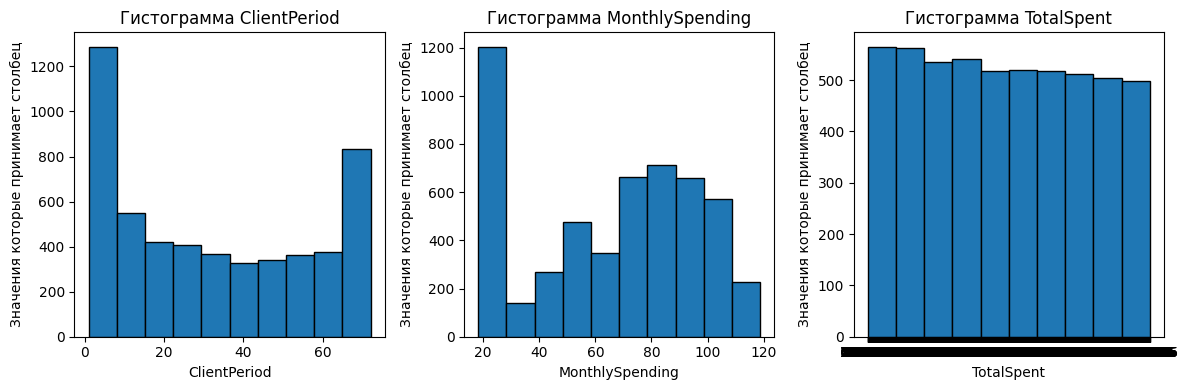

In [9]:
plt.figure(figsize=(12, 4))

# Постройте гистограмму для 'ClientPeriod'
plt.subplot(131)
plt.hist(df_train['ClientPeriod'], bins=10, edgecolor='k')
plt.xlabel('ClientPeriod')
plt.ylabel('Значения которые принимает столбец')
plt.title('Гистограмма ClientPeriod')

# Постройте гистограмму для 'MonthlySpending'
plt.subplot(132)
plt.hist(df_train['MonthlySpending'], bins=10, edgecolor='k')
plt.xlabel('MonthlySpending')
plt.ylabel('Значения которые принимает столбец')
plt.title('Гистограмма MonthlySpending')

# Постройте гистограмму для 'TotalSpent'
plt.subplot(133)
plt.hist(df_train['TotalSpent'], bins=10, edgecolor='k')
plt.xlabel('TotalSpent')
plt.ylabel('Значения которые принимает столбец')
plt.title('Гистограмма TotalSpent')

plt.tight_layout()
plt.show()

Создаём круговые диаграммы для категориальных признаков

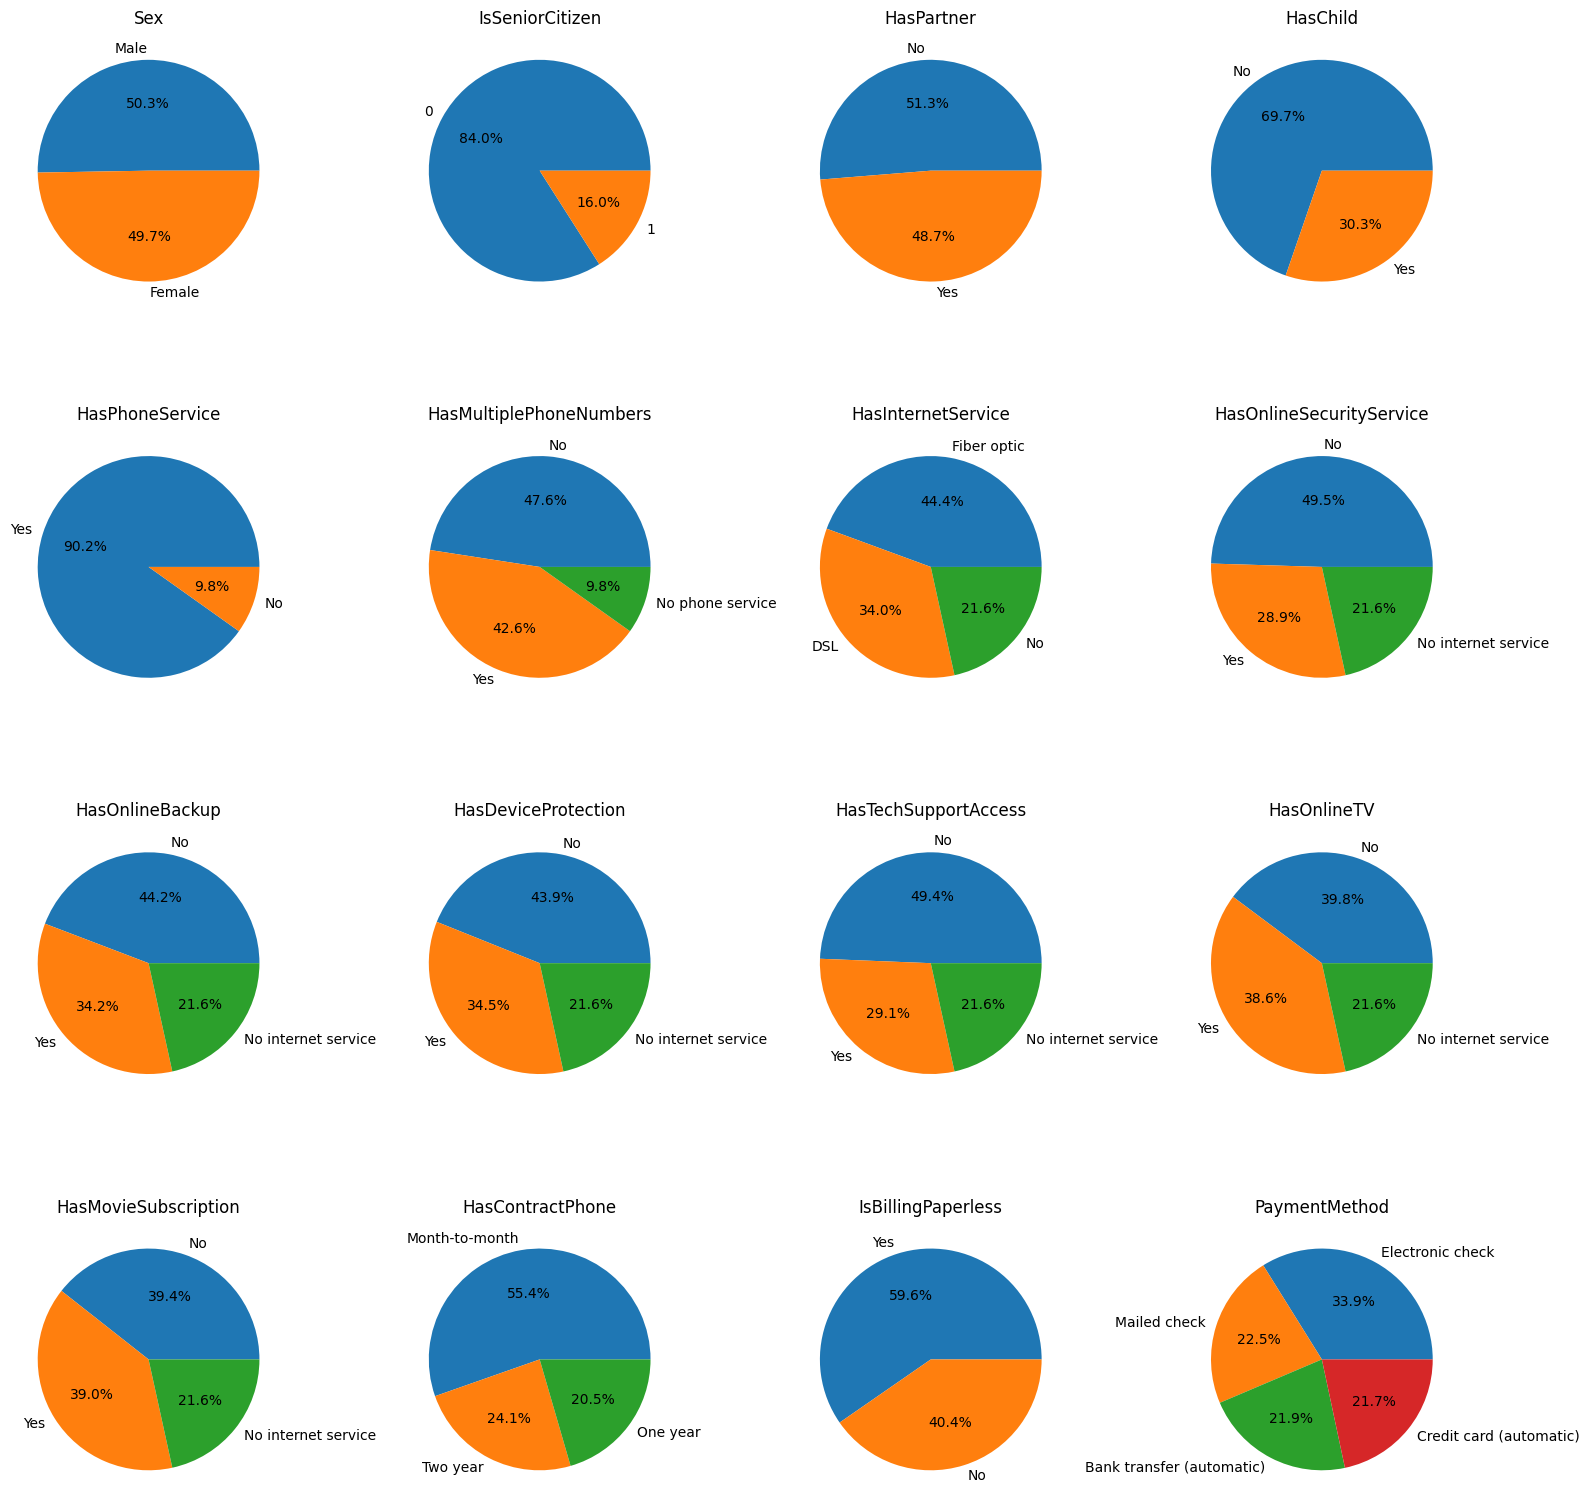

In [10]:
n_cols = 4  # Количество колонок
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Рассчитайте количество строк
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))

# Для каждого категориального признака выполните data.value_counts() и постройте круговую диаграмму
for i, column in enumerate(cat_cols):
    row, col = divmod(i, n_cols)  # Вычислите номер строки и столбца
    value_counts = df_train[column].value_counts()

    # Постройте круговую диаграмму
    ax = axes[row, col]
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    ax.set_title(f'{column}')

# Удалите лишние графики, если количество признаков не кратно n_cols
for i in range(len(cat_cols), n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Построим график для определения дизбаланса классов

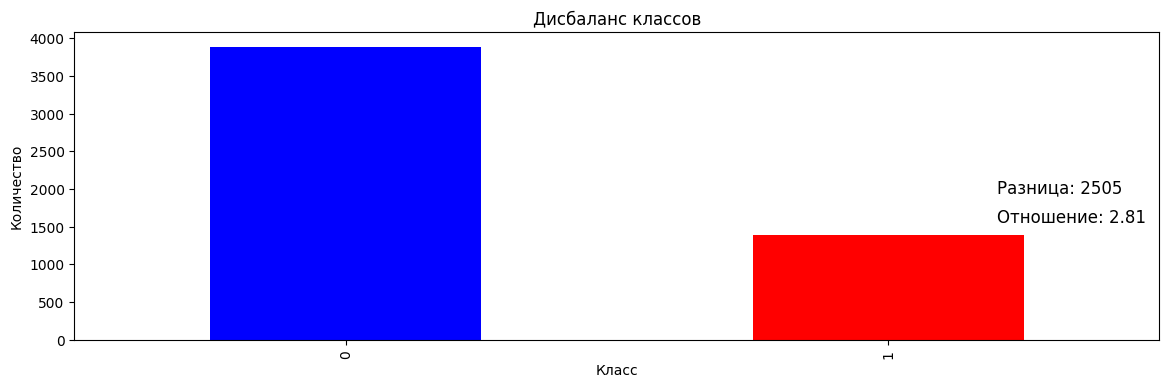

In [11]:
class_counts = df_train['Churn'].value_counts()

class_difference = abs(class_counts[0] - class_counts[1])

class_ratio = class_counts[0] / class_counts[1]

plt.figure(figsize=(14, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.title('Дисбаланс классов')

plt.text(1.2, max(class_counts) // 2, f'Разница: {class_difference}', fontsize=12, color='black')
plt.text(1.2, max(class_counts) // 2 - max(class_counts) // 10, f'Отношение: {class_ratio:.2f}', fontsize=12, color='black')

plt.show()

В столбце TotalSpent окргулим числа до целых

In [12]:
df_train['TotalSpent'] = df_train['TotalSpent'].apply(lambda x: round(float(x)))


Используем one-hot encoding для того чтобы категориальные данные стали числовыми

In [13]:
y = df_train['Churn']
df_train = df_train.drop(columns='Churn')

In [14]:
numeric_data = df_train[num_cols[0:-1]]

categorical_data = df_train[cat_cols[0:-1]]

dummy_features = pd.get_dummies(categorical_data)

X = pd.concat([numeric_data, dummy_features], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                  train_size=0.8,
                                                  random_state=100) #разделение на трейновую и тестовую выборки

# Применение линейной модели

С помощью GridSearchCV подбираем лучшие гиперпараметры

In [134]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    "logisticregression__class_weight": [None, 'balanced', {0: 1, 1: 2}],
    "logisticregression__max_iter": np.arange(1,150),
    'logisticregression__penalty': [None, 'l2']
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

validation_score = grid_search.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

In [16]:
print(best_params)
print(best_score)

NameError: ignored

Лучшими были определены следущие гиперпараметры: 'logisticregression__C': 100, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}

Посчитаем roc_auc используя их

In [17]:
log_reg = LogisticRegression(C=100, class_weight=None,max_iter=100,penalty='l2')

log_reg.fit(X_train, y_train)
y_test_predict = log_reg.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_test_predict)

print(f"roc_auc LogisticRegressionCV: {roc_auc_test}")


roc_auc LogisticRegressionCV: 0.8305361305361304


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Таким образом удалось получить roc_auc 0.8305361305361304

# Применение градиентного бустинга

Была использована библиотека catboost, методом научного тыка были подобраны гиперпараметры, немного обработаем данные для catboost

In [29]:
categorical_columns = np.array([2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
df_train = pd.read_csv('train.csv')
df_train = df_train.drop_duplicates()
df_train = df_train.replace(' ', np.nan)
df_train = df_train.dropna()
df_train['TotalSpent'] = df_train['TotalSpent'].apply(lambda x: round(float(x)))
y = df_train['Churn']
X = df_train.drop(columns='Churn')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                  train_size=0.8,
                                                  random_state=100)

In [31]:
boosting_model = catboost.CatBoostClassifier(n_estimators=73,
                                             learning_rate=0.21,
                                             depth=6,
                                             subsample=0.7,
                                             loss_function="Logloss",
                                             cat_features=categorical_columns)

boosting_model.fit(X_train, y_train)

y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_test_predicted)

0:	learn: 0.6175223	total: 59.1ms	remaining: 4.25s
1:	learn: 0.5673863	total: 72.7ms	remaining: 2.58s
2:	learn: 0.5307479	total: 86.3ms	remaining: 2.01s
3:	learn: 0.5006828	total: 98.2ms	remaining: 1.69s
4:	learn: 0.4781760	total: 109ms	remaining: 1.48s
5:	learn: 0.4618884	total: 122ms	remaining: 1.37s
6:	learn: 0.4508462	total: 134ms	remaining: 1.26s
7:	learn: 0.4431390	total: 153ms	remaining: 1.24s
8:	learn: 0.4384506	total: 157ms	remaining: 1.12s
9:	learn: 0.4316458	total: 173ms	remaining: 1.09s
10:	learn: 0.4254269	total: 189ms	remaining: 1.06s
11:	learn: 0.4218093	total: 201ms	remaining: 1.02s
12:	learn: 0.4184816	total: 211ms	remaining: 976ms
13:	learn: 0.4150814	total: 226ms	remaining: 954ms
14:	learn: 0.4117025	total: 249ms	remaining: 964ms
15:	learn: 0.4106607	total: 255ms	remaining: 908ms
16:	learn: 0.4085910	total: 267ms	remaining: 878ms
17:	learn: 0.4067700	total: 280ms	remaining: 855ms
18:	learn: 0.4048768	total: 291ms	remaining: 828ms
19:	learn: 0.4028595	total: 301ms	rem

In [32]:
print(test_auc)

0.8409547569604676


С такими гиперпараметрами добились roc_auc 0.8409547569604676